In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the apps data 
app = pd.read_csv (r'E:\googleplaystore.csv')

## Description of App Dataset

In [3]:
app.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# look at the random 10 records in the apps dataframe
app.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1454,Trulia Real Estate & Rentals,HOUSE_AND_HOME,4.5,175293,Varies with device,"10,000,000+",Free,0,Everyone,House & Home,"July 24, 2018",Varies with device,Varies with device
8177,Translate: text & voice translator,TOOLS,4.3,122010,7.3M,"5,000,000+",Free,0,Everyone,Tools,"July 14, 2018",Translator 10.9.2,4.0.3 and up
4205,tinyCam Monitor FREE,HOUSE_AND_HOME,4.0,65914,Varies with device,"10,000,000+",Free,0,Everyone,House & Home,"June 29, 2018",Varies with device,Varies with device
8509,Dr D K Olukoya,LIFESTYLE,NaN,0,3.3M,1+,Free,0,Teen,Lifestyle,"July 25, 2018",1.0,4.1 and up
5739,AW Toolbox,BUSINESS,NaN,3,13M,100+,Paid,$19.90,Everyone,Business,"December 22, 2016",1.6.2,4.0 and up
10733,FP Click sound changer,PERSONALIZATION,3.5,178,1.4M,"10,000+",Free,0,Everyone,Personalization,"December 26, 2015",1.0,1.6 and up
8448,Story Saver for Instagram,PHOTOGRAPHY,4.5,41331,5.0M,"5,000,000+",Free,0,Everyone,Photography,"July 31, 2018",1.4.4,4.0.3 and up
8489,DK Primrose for KLWP,PERSONALIZATION,NaN,0,16M,1+,Paid,$0.99,Everyone,Personalization,"December 2, 2017",v2017.Dec.01.19,4.4 and up
4677,V for Voodoo,GAME,4.2,16876,59M,"1,000,000+",Free,0,Teen,Trivia,"June 28, 2018",3.0.1,6.0 and up
1568,Chart - Myanmar Keyboard,LIFESTYLE,4.4,39364,28M,"5,000,000+",Free,0,Everyone,Lifestyle,"July 17, 2018",10.19,4.0.3 and up


In [5]:
# list of columns 
app.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
#Type of reviews
app['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [7]:
# type of Category
app['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
# type of Type
app['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [9]:
# type of Content Rating
app['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [10]:
# type of Genres
app['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [11]:
# look that the info of the dataframe
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

In [12]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'

app['Reviews'] = app['Reviews'].astype(float)

ValueError: could not convert string to float: '3.0M'

In [13]:
app.Reviews.dtype

dtype('O')

In [14]:
reviews = [i for i in app['Reviews']]

def clean_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for review in reviews_list:
        if 'M' in review:
            review = review.replace('M', '')
            review = float(review) * 1000000  # 1M = 1,000,000
        cleaned_data.append(review)
    return cleaned_data

app['Reviews'] = clean_reviews(reviews)
app['Reviews'] = app['Reviews'].astype(float)

In [15]:
app.Reviews.dtype

dtype('float64')

In [ ]:
# 2) clean the 'Size' data and change the type 'object' to 'float'

sizes = [i for i in app['Size']]

def clean_sizes(sizes_list):
    """
    As sizes are represented in 'M' and 'k', we remove 'M'
    and convert 'k'/kilobytes into megabytes
    """
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # 1 megabyte = 1024 kilobytes
        # representing 'Varies with device' with value 0
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data

app['Size'] = clean_sizes(sizes)
app['Size'] = app['Size'].astype(float)

In [16]:
# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'

index = app[app['Size'] == '1,000+'].index

app.drop(axis=0, inplace=True, index=index)

sizes = [i for i in app['Size']]

def clean_sizes(sizes_list):
    """
    As sizes are represented in 'M' and 'k', we remove 'M'
    and convert 'k'/kilobytes into megabytes
    """
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # 1 megabyte = 1024 kilobytes
        # representing 'Varies with device' with value 0
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data

app['Size'] = clean_sizes(sizes)
app['Size'] = app['Size'].astype(float)

In [17]:
app.Size.dtype

dtype('float64')

In [18]:
# 3) clean the 'Installs' data and change the type 'object' to 'float'
installs = [i for i in app['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
app['Installs'] = clean_installs(installs)
app['Installs'] = app['Installs'].astype(float)

In [19]:
app.Installs.dtype

dtype('float64')

In [20]:
# 4) clean the 'Price' data and change the type 'object' to 'float'
prices = [i for i in app['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

app['Price'] = clean_prices(prices)
app['Price'] = app['Price'].astype(float)

In [21]:
app.Price.dtype

dtype('float64')

In [23]:
# check on null values
app.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [24]:
# remove the record where 'Type' is having null value
index = app[app['Type'].isna()].index
app.drop(axis=0, inplace=True, index=index)

In [26]:
# check on null values
app.isna().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [27]:
# check on statistical information of the dataframe
app.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.083900e+04,10839.000000,1.083900e+04,10839.000000
mean,4.191757,4.441939e+05,18.153458,1.546577e+07,1.027463
std,0.515219,2.927893e+06,22.171186,8.503315e+07,15.950436
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,2.600000,3.000000e+03,0.000000
50%,4.300000,2.094000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


## Analysis and Visualization

### Get the Total installs for each category

In [39]:
category_total_installs= app.groupby('Category')['Installs'].sum()
category_total_installs = category_total_installs.reset_index()  # to convert groupby object into dataframe

In [40]:
category_total_installs

,Category,Installs
0,ART_AND_DESIGN,1.243381e+08
1,AUTO_AND_VEHICLES,5.313021e+07
2,BEAUTY,2.719705e+07
3,BOOKS_AND_REFERENCE,1.921470e+09
4,BUSINESS,1.001915e+09
5,COMICS,5.608615e+07
6,COMMUNICATION,3.264728e+10
7,DATING,2.643108e+08
8,EDUCATION,8.714520e+08
9,ENTERTAINMENT,2.869160e+09


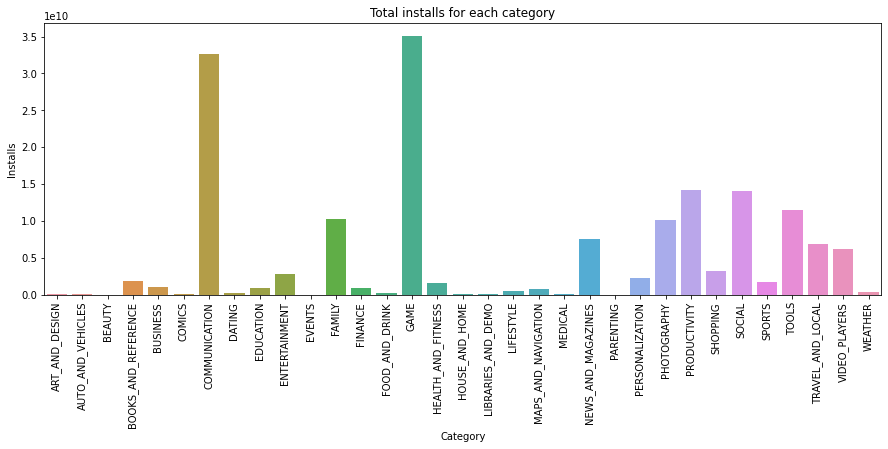

In [49]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Installs', data=category_total_installs)
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Total installs for each category')
plt.show()

### Get  the Total prices of each "paid app" in each category

In [52]:
Total_prices_by_category= app.groupby('Category')['Price'].sum().reset_index()

In [53]:
Total_prices_by_category

,Category,Price
0,ART_AND_DESIGN,5.97
1,AUTO_AND_VEHICLES,13.47
2,BEAUTY,0.00
3,BOOKS_AND_REFERENCE,119.77
4,BUSINESS,185.27
5,COMICS,0.00
6,COMMUNICATION,83.14
7,DATING,31.43
8,EDUCATION,17.96
9,ENTERTAINMENT,7.98


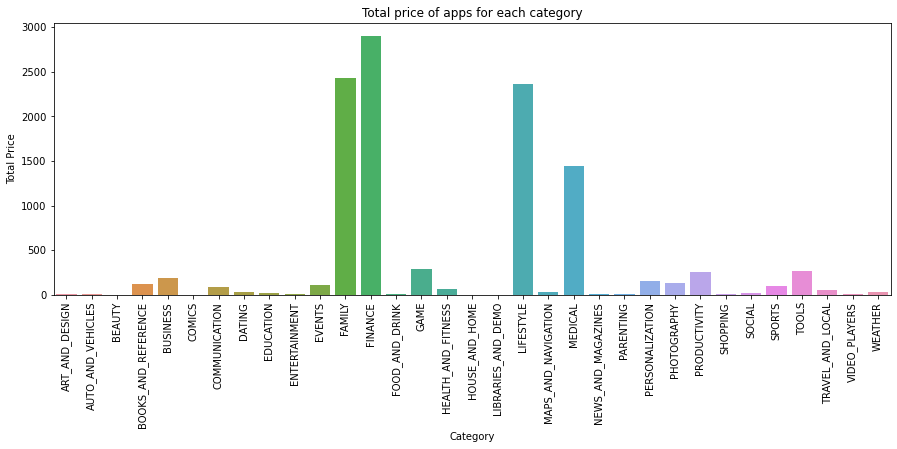

In [55]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Price', data=Total_prices_by_category)
plt.xticks(rotation=90)
plt.ylabel('Total Price')
plt.title('Total price of apps for each category')
plt.show()

### Added question : Average prices by category

In [69]:
Average_prices_by_category= app.groupby('Category')['Price'].mean().reset_index()

In [70]:
Average_prices_by_category

,Category,Price
0,ART_AND_DESIGN,0.091846
1,AUTO_AND_VEHICLES,0.158471
2,BEAUTY,0.000000
3,BOOKS_AND_REFERENCE,0.518485
4,BUSINESS,0.402761
5,COMICS,0.000000
6,COMMUNICATION,0.214832
7,DATING,0.134316
8,EDUCATION,0.115128
9,ENTERTAINMENT,0.053557


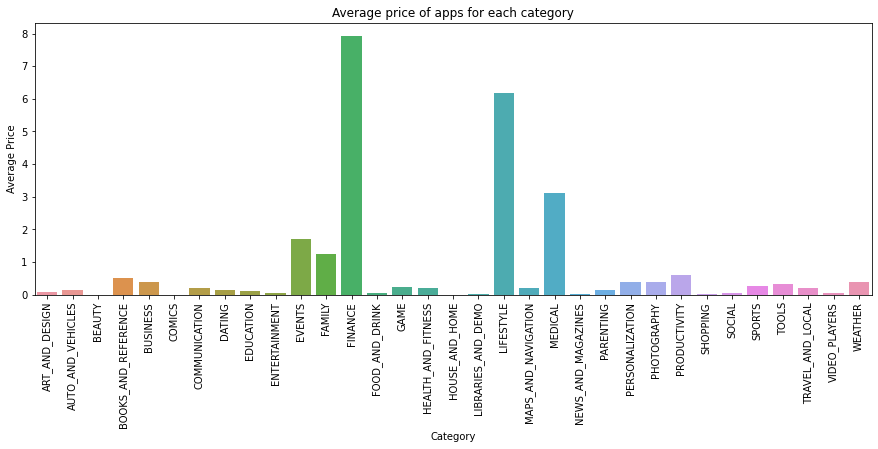

In [71]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Price', data=Average_prices_by_category)
plt.xticks(rotation=90)
plt.ylabel('Average Price')
plt.title('Average price of apps for each category')
plt.show()

### Total profit of each category

In [64]:
app['Income']= app['Installs'] * app[('Price')]

In [67]:
app['Income']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Income, Length: 10839, dtype: float64

In [73]:
Total_Income_by_category= app.groupby('Category')['Income'].sum().reset_index()

In [74]:
Total_Income_by_category

,Category,Income
0,ART_AND_DESIGN,3.184000e+04
1,AUTO_AND_VEHICLES,1.001485e+05
2,BEAUTY,0.000000e+00
3,BOOKS_AND_REFERENCE,9.022674e+04
4,BUSINESS,2.048543e+06
5,COMICS,0.000000e+00
6,COMMUNICATION,4.247364e+06
7,DATING,8.836150e+04
8,EDUCATION,2.403980e+06
9,ENTERTAINMENT,7.980000e+05


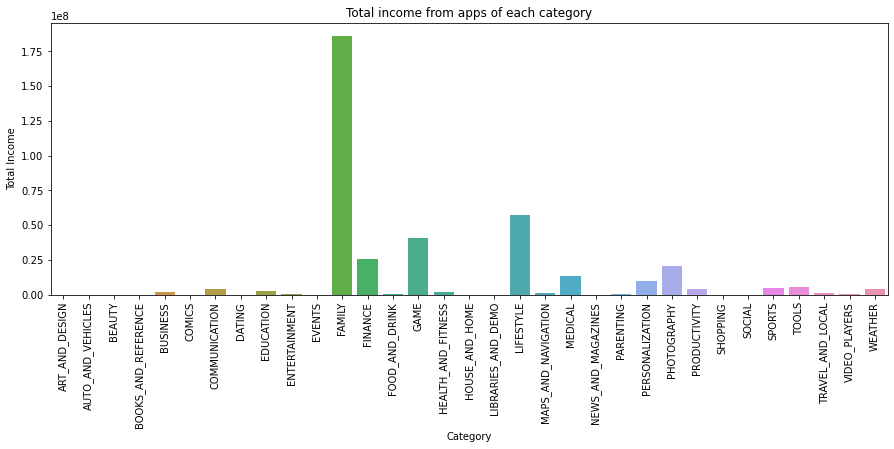

In [75]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Income', data=Total_Income_by_category)
plt.xticks(rotation=90)
plt.ylabel('Total Income')
plt.title('Total income from apps of each category')
plt.show()